#INTERPOLACION CON PIL
En este ejercicio vamos a explorar cómo diferentes métodos de interpolación afectan la visualización de una imagen utilizando la biblioteca PIL (Python Imaging Library) y matplotlib. Analizaremos los efectos visuales que producen estos métodos al aplicar transformaciones comunes como la visualización directa, la rotación de la imagen en distintos ángulos y un zoom en una región específica seleccionada por coordenadas. Esto nos permitirá comprender mejor cómo se comportan los algoritmos de interpolación al modificar una imagen, y qué impacto tienen sobre la calidad y el detalle percibido según el tipo de operación aplicada.

##**INTERPOLACION**
La interpolación sirve para determinar cómo se visualiza la imagen cuando se adapta a un espacio de tamaño diferente (en este caso cada subplot). Afecta el nivel de suavidad, nitidez o pixelado de la imagen mostrada, aunque no modifiques la imagen original ni su tamaño.

**USOS**
* Hacer zoom en una imagen	Evita que se vea pixelada.
* Rotar o transformar imágenes	Mantiene la calidad visual.
* Cambiar resolución de imágenes	Genera una nueva imagen suave, sin bordes duros ni bloques.

**METODOS**
* none: Sin interpolación
* nearest: El píxel más cercano
* bilinear: Lo que hace la interpolacion bilinear es mirar los 4 píxeles más cercanos (como si estuvieran en una cruz alrededor del píxel), y saca un promedio entre ellos.
* bicubic: La interpolación cúbica en lugar de mirar solo 4 vecinos como el bilinear, el método bicubic mira 16 píxeles cercanos (4x4) y usa una fórmula matemática más compleja (cúbica) para calcular el nuevo valor.
* spline16: La interpolación spline16 usa curvas suaves (llamadas "splines") para conectar los puntos de la imagen en vez de líneas rectas o cálculos entre vecinos,
* lanczos: El objetivo es estimar el valor de un nuevo píxel basándose en los valores de píxeles cercanos, utilizando una función matemática llamada "función sinc".
  * El método considera varios píxeles alrededor del nuevo punto (no solo los más cercanos).
  * Pondera la influencia de cada píxel según la forma de la función sinc, dándole más peso a los más cercanos y menos a los lejanos.
  * Genera una estimación que conserva mejor los detalles finos y bordes de la imagen, evitando los artefactos comunes de métodos más simples.

In [1]:
# Importo librerias
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from PIL import Image
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

##CARGA DE LA IMAGEN

In [2]:
!wget 'https://images.freeimages.com/fic/images/icons/1288/futurama_vol_3_the_aliens/256/neutral_embassador.png'

--2025-04-20 02:16:52--  https://images.freeimages.com/fic/images/icons/1288/futurama_vol_3_the_aliens/256/neutral_embassador.png
Resolving images.freeimages.com (images.freeimages.com)... 18.172.170.120, 18.172.170.60, 18.172.170.64, ...
Connecting to images.freeimages.com (images.freeimages.com)|18.172.170.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14687 (14K) [image/png]
Saving to: ‘neutral_embassador.png’

neutral_embassador. 100%[===================>]  14.34K  --.-KB/s    in 0s      

2025-04-20 02:16:52 (331 MB/s) - ‘neutral_embassador.png’ saved [14687/14687]



In [3]:
im = Image.open("neutral_embassador.png")

##COMPARACION METODOS

In [4]:
# Lista de metodos
metodos = ['none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'lanczos']

###VISUALIZACION

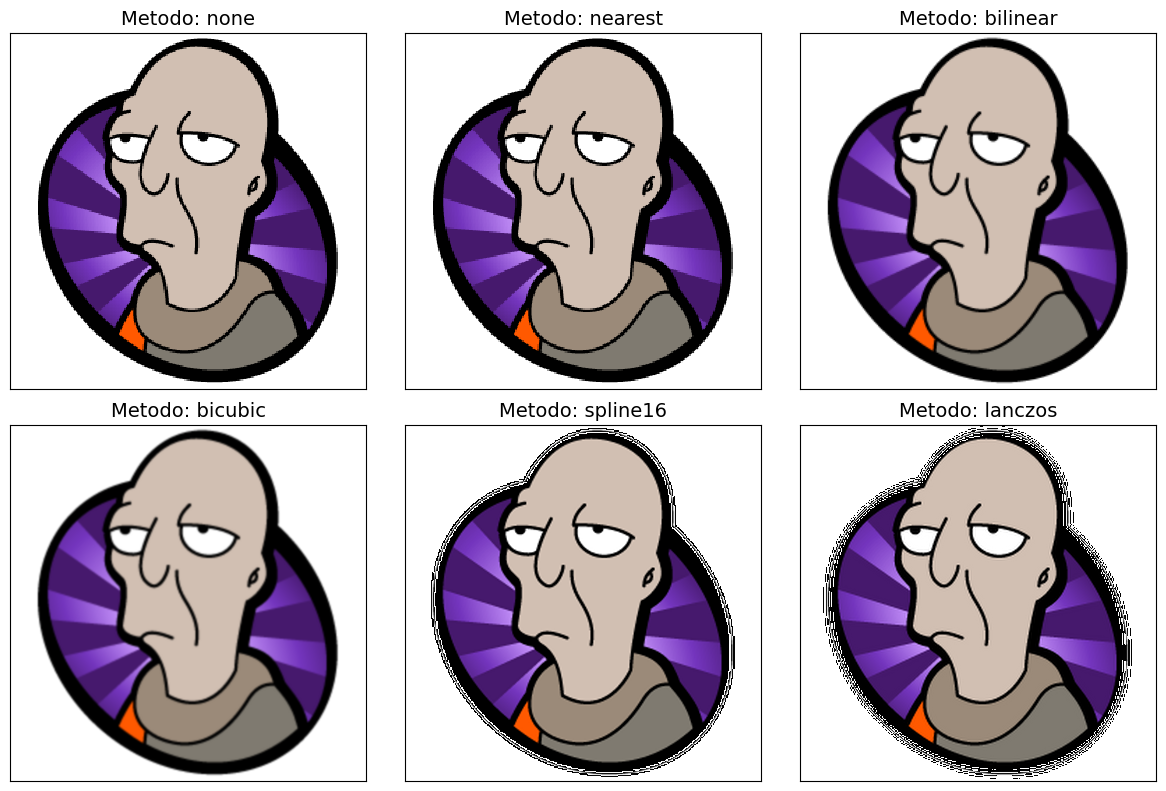

  Método  Ancho (width)  Alto (height) Modo (mode) Formato (format)                            Tipo de objeto
    none            256            256        RGBA              PNG <class 'PIL.PngImagePlugin.PngImageFile'>
 nearest            256            256        RGBA              PNG <class 'PIL.PngImagePlugin.PngImageFile'>
bilinear            256            256        RGBA              PNG <class 'PIL.PngImagePlugin.PngImageFile'>
 bicubic            256            256        RGBA              PNG <class 'PIL.PngImagePlugin.PngImageFile'>
spline16            256            256        RGBA              PNG <class 'PIL.PngImagePlugin.PngImageFile'>
 lanczos            256            256        RGBA              PNG <class 'PIL.PngImagePlugin.PngImageFile'>


In [5]:
# Muestra la imagen con diferentes métodos de interpolación
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for ax, interp_method in zip(axes.flat, metodos):
    ax.imshow(im, interpolation=interp_method)
    titulo = f'Metodo: {interp_method}'
    ax.set_title(titulo, fontsize=14)

plt.tight_layout()
plt.show()

# Creo un Dataframe con los datos de las imagenes procesadas con los distintos metodos para verificar que no cambio su estructura
data = {
    'Método': metodos,
    'Ancho (width)': [im.width] * len(metodos),
    'Alto (height)': [im.height] * len(metodos),
    'Modo (mode)': [im.mode] * len(metodos),
    'Formato (format)': [im.format] * len(metodos),
    'Tipo de objeto': [str(type(im))] * len(metodos)
}

df = pd.DataFrame(data)
print(df.to_string(index=False))

###ROTACION

In [6]:
# Mapeo de opciones de rotación PIL
# Las opciones de resample de PIL son menores que los metodos de viusualizacion pero operan de igual forma
metodos_resample = {
    'NEAREST': Image.NEAREST,
    'BILINEAR': Image.BILINEAR,
    'BICUBIC': Image.BICUBIC,
}

# Función para mostrar la imagen rotada con método elegido
def mostrar_rotacion(angulo, metodo_rotacion):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
    fig.subplots_adjust(hspace=0.3, wspace=0.1)

    # Aplica rotación con el método seleccionado desde el dropdown
    rotada = im.rotate(-angulo, resample=metodos_resample[metodo_rotacion])
    im_np = np.array(rotada)

    # Interpola la imagen iterando con cada metodo
    for ax, metodo in zip(axes.flat, metodos):
        ax.imshow(im_np, interpolation=metodo)
        ax.set_title(f'Método: {metodo}', fontsize=12)

    plt.tight_layout()
    plt.show()

# Slider de ángulo
slider_angulo = widgets.IntSlider(value=0, min=0, max=360, step=1, description='Ángulo (°):')

# Dropdown de método de rotación
dropdown_metodo = widgets.Dropdown(
    options=['NEAREST', 'BILINEAR', 'BICUBIC'],
    value='BICUBIC',
    description='Metodo Rot:',
)

# Muestra widgets interactivos
widgets.interact(mostrar_rotacion, angulo=slider_angulo, metodo_rotacion=dropdown_metodo)

interactive(children=(IntSlider(value=0, description='Ángulo (°):', max=360), Dropdown(description='Metodo Rot…

<function __main__.mostrar_rotacion(angulo, metodo_rotacion)>

###ZOOM

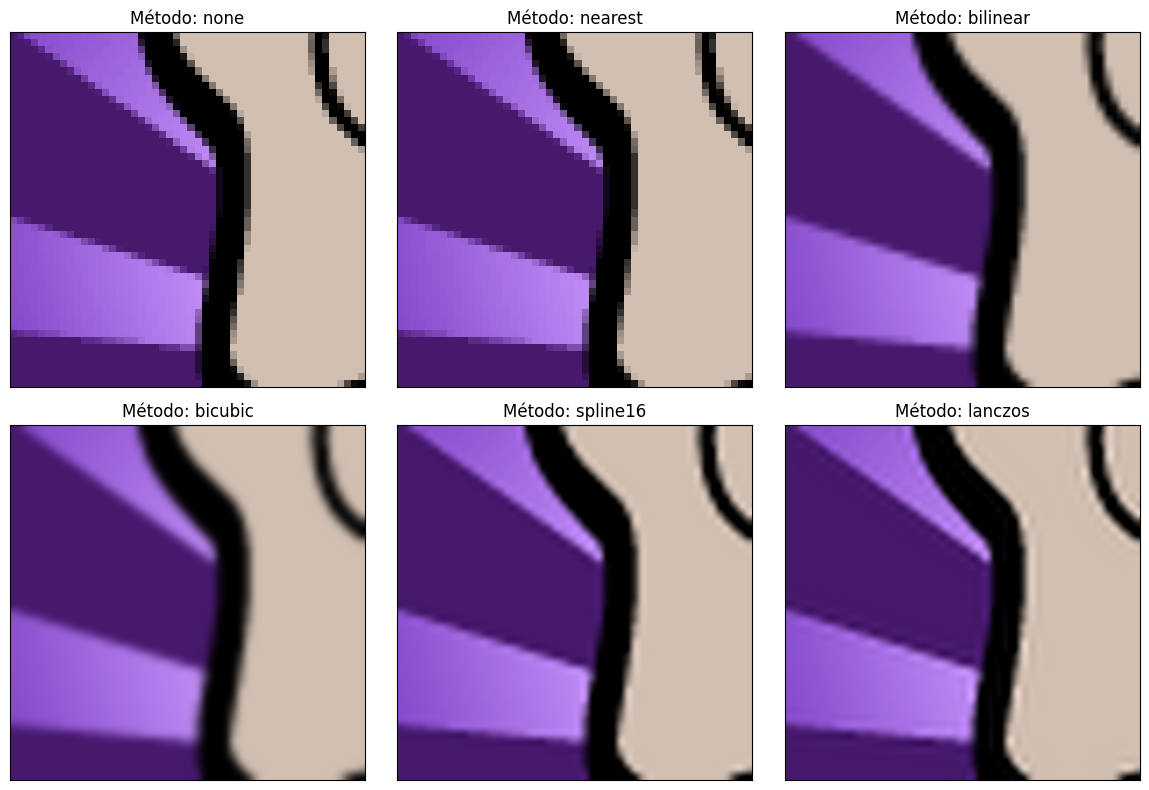

In [7]:
# Coordenadas del recorte para hacer zoom
x1, y1 = 50, 100  # esquina superior izquierda
x2, y2 = 100, 150  # esquina inferior derecha

# Recorto la imagen (zoom sobre esa región)
zoom_area = im.crop((x1, y1, x2, y2))

# Convierto a array para usar en imshow
zoom_np = np.array(zoom_area)

# Muestra la imagen con los distintos métodos
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.3, wspace=0.1)

for ax, metodo in zip(axes.flat, metodos):
    ax.imshow(zoom_np, interpolation=metodo)
    ax.set_title(f'Método: {metodo}', fontsize=12)

plt.tight_layout()
plt.show()